In [38]:
from Bio import SeqIO
import pandas as pd
import numpy as np

In [39]:
mir_names = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/mirna_drug_1043_2166.txt",sep=',',index_col=0,header=0).index.values.tolist()
print(len(mir_names),mir_names[0:5])

1043 ['hsa-let-7', 'hsa-let-7a', 'hsa-let-7a-1', 'hsa-let-7a-2', 'hsa-let-7a-3']


In [40]:
name2seq = {}

with open("../MultiView/miRNA.dat") as handle:
    for record in SeqIO.parse(handle, "embl"):
        # print(record.features)
        # if "miRNA" in record.features or "miRNA_primary_transcript" in record.features or "pre_miRNA" in record.features:
        # 提取miRNA的ID、名称和序列信息
        mir_id = record.id
        mir_name = record.name
        mir_seq = str(record.seq)
        
        # if mir_name in mir_names:
        #     name2seq[mir_name] = mir_seq
        if mir_name.startswith("hsa-"):
            name2seq[mir_name] = mir_seq
        # IDs.append(mir_id)
        # Names.append(mir_name)
        # Sequences.append(mir_seq)

        # print(f"miRNA ID: {mir_id}")
        # print(f"miRNA Name: {mir_name}")
        # print(f"miRNA Sequence: {mir_seq}\n")

In [41]:
print(len(name2seq),name2seq.keys())

1917 dict_keys(['hsa-let-7a-1', 'hsa-let-7a-2', 'hsa-let-7a-3', 'hsa-let-7b', 'hsa-let-7c', 'hsa-let-7d', 'hsa-let-7e', 'hsa-let-7f-1', 'hsa-let-7f-2', 'hsa-mir-15a', 'hsa-mir-16-1', 'hsa-mir-17', 'hsa-mir-18a', 'hsa-mir-19a', 'hsa-mir-19b-1', 'hsa-mir-19b-2', 'hsa-mir-20a', 'hsa-mir-21', 'hsa-mir-22', 'hsa-mir-23a', 'hsa-mir-24-1', 'hsa-mir-24-2', 'hsa-mir-25', 'hsa-mir-26a-1', 'hsa-mir-26b', 'hsa-mir-27a', 'hsa-mir-28', 'hsa-mir-29a', 'hsa-mir-30a', 'hsa-mir-31', 'hsa-mir-32', 'hsa-mir-33a', 'hsa-mir-92a-1', 'hsa-mir-92a-2', 'hsa-mir-93', 'hsa-mir-95', 'hsa-mir-96', 'hsa-mir-98', 'hsa-mir-99a', 'hsa-mir-100', 'hsa-mir-101-1', 'hsa-mir-29b-1', 'hsa-mir-29b-2', 'hsa-mir-103a-2', 'hsa-mir-103a-1', 'hsa-mir-105-1', 'hsa-mir-105-2', 'hsa-mir-106a', 'hsa-mir-107', 'hsa-mir-16-2', 'hsa-mir-192', 'hsa-mir-196a-1', 'hsa-mir-197', 'hsa-mir-198', 'hsa-mir-199a-1', 'hsa-mir-208a', 'hsa-mir-129-1', 'hsa-mir-148a', 'hsa-mir-30c-2', 'hsa-mir-30d', 'hsa-mir-139', 'hsa-mir-147a', 'hsa-mir-7-1', 'hsa-

In [42]:
print(mir_names)

['hsa-let-7', 'hsa-let-7a', 'hsa-let-7a-1', 'hsa-let-7a-2', 'hsa-let-7a-3', 'hsa-let-7b', 'hsa-let-7c', 'hsa-let-7d', 'hsa-let-7e', 'hsa-let-7f', 'hsa-let-7f-1', 'hsa-let-7f-2', 'hsa-let-7g', 'hsa-let-7i', 'hsa-mir-1', 'hsa-mir-1-1', 'hsa-mir-1-2', 'hsa-mir-10', 'hsa-mir-100', 'hsa-mir-101', 'hsa-mir-101-1', 'hsa-mir-101-2', 'hsa-mir-103', 'hsa-mir-103-1', 'hsa-mir-103a', 'hsa-mir-103a-1', 'hsa-mir-103a-2', 'hsa-mir-103b', 'hsa-mir-103b-1', 'hsa-mir-103b-2', 'hsa-mir-105', 'hsa-mir-105-1', 'hsa-mir-105-2', 'hsa-mir-106', 'hsa-mir-106a', 'hsa-mir-106b', 'hsa-mir-107', 'hsa-mir-10a', 'hsa-mir-10b', 'hsa-mir-112', 'hsa-mir-1178', 'hsa-mir-1179', 'hsa-mir-1180', 'hsa-mir-1181', 'hsa-mir-1182', 'hsa-mir-1183', 'hsa-mir-1184', 'hsa-mir-1184-1', 'hsa-mir-1185', 'hsa-mir-1202', 'hsa-mir-1206', 'hsa-mir-1207', 'hsa-mir-122', 'hsa-mir-1224', 'hsa-mir-1225', 'hsa-mir-1226', 'hsa-mir-1227', 'hsa-mir-1228', 'hsa-mir-1229', 'hsa-mir-122a', 'hsa-mir-1231', 'hsa-mir-1233', 'hsa-mir-1233-1', 'hsa-mir-1

In [43]:
maxl = -1
minl = 100000
for key in name2seq.keys():
    maxl = max(len(name2seq[key]),maxl)
    minl = min(len(name2seq[key]),minl)
print(maxl,minl)

180 41


In [57]:
count = 0
with open("mirna_seq.txt","w") as f:
    for mir in mir_names:
        if mir.strip() in name2seq.keys():
            f.write(mir.strip() + "," + name2seq[mir.strip()] + ",\n")
            count += 1
        else:
            f.write(mir.strip() + ",,\n")
# count = 0
# for mir in mir_names:
#     if mir.strip() in name2seq.keys():
#         count += 1

#     else:
#         print(mir)
print(count)

812


In [58]:
with open("mirna_seq_all.txt","w") as f:
    for mir,seq in name2seq.items():
        f.write(mir.strip() + "," + seq + ",\n")    

In [44]:
from Bio import pairwise2
from Bio.Seq import Seq

In [46]:
sequences = []
for mir in mir_names:
    if mir.strip() in name2seq.keys():
        sequences.append(name2seq[mir.strip()].strip())
    else:
        sequences.append("")
print(len(sequences))

1043


In [47]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist

In [48]:
matlist.blosum80
for i in ['A', 'U', 'G', 'C']:
    for j in ['A', 'U', 'G', 'C']:
        print(matlist.blosum62.get((i,j)),end=" ")

4 None None None None None None None 0 None 6 -3 0 None None 9 

In [51]:
rna_sqe_sim = np.zeros((len(sequences),len(sequences)),dtype=np.float32)

for i in range(0,len(sequences)):
    rna_sqe_sim[i,i] = 1.0
    for j in range(i,len(sequences)):
        if sequences[i] == "" or sequences[j] == "":
            rna_sqe_sim[i,j] = 0.0
            rna_sqe_sim[j,i] = 0.0
        else:
            # alignments  = pairwise2.align.globalds(rnai, rnaj, matlist.blosum62, -10, -0.5)
            score  = pairwise2.align.globalxx(sequences[i], sequences[j], score_only=True)
            sim_score = score / max(len(sequences[i]), len(sequences[j]))
            rna_sqe_sim[i,j] = sim_score
            rna_sqe_sim[j,i] = sim_score

# rna_sqe_sim = (rna_sqe_sim - np.min(rna_sqe_sim)) / (np.max(rna_sqe_sim) - np.min(rna_sqe_sim))
print(rna_sqe_sim)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.5925926  0.525      0.        ]
 ...
 [0.         0.         0.5925926  ... 1.         0.67901236 0.        ]
 [0.         0.         0.525      ... 0.67901236 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [54]:
print(rna_sqe_sim.sum())

359751.88


In [55]:
np.savetxt("rna_sqe_sim.txt",rna_sqe_sim,delimiter=',')

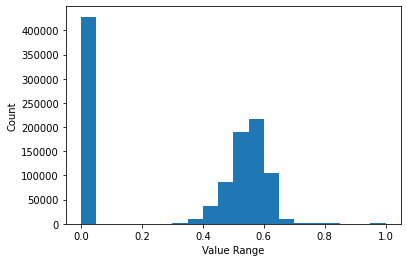

In [58]:
import matplotlib.pyplot as plt

plt.hist(rna_sqe_sim.flatten(), bins=20, range=(0, 1))
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.show()